<a href="https://colab.research.google.com/github/kdanu/Data-Science-Project/blob/main/Stroke_Predictive_analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Prediksi penyakit stroke**

tahap pertama yang kita lakukan adalah mengimport sebuat library yang dibutuhkan

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn import metrics

lalu kita load dataset yang digunakan, bisa di download di link ini https://www.kaggle.com/fedesoriano/stroke-prediction-dataset

In [ ]:
url= '/content/drive/MyDrive/healthcare-dataset-stroke-data.csv'
df= pd.read_csv(url)
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0




selanjutnya kita cek apakah ada missing value di dataset yang kita gunakan, dapat dilihat pada kolom 'bmi' ada missing value

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [ ]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


karena dataset yang kita punya tidak cukup banyak (hanya sekitar 5000 an baris) maka yang kita lakukan adalah mengisi missing value tersebut dengan rata-rata nilai dikolom tersebut

In [ ]:
df['bmi'].fillna((df['bmi'].mean()), inplace= True)
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


dapat dilihat di bawah ini bahwa sudah tidak ada lagi missing value pada kolom 'bmi'

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                5110 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


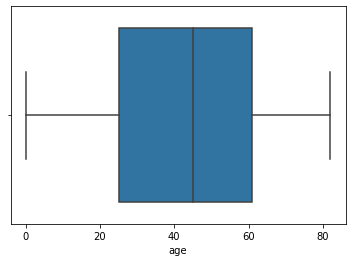

In [ ]:
sns.boxplot(x=df['age'])

selanjutnya kita cek apakah ada outlier di dataset kita, contohnya seperti di kolom 'avg_glucose_level' dan 'bmi' ada outlier .

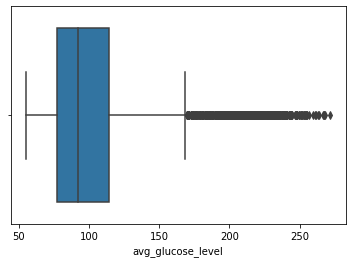

In [ ]:
sns.boxplot(x=df['avg_glucose_level'])

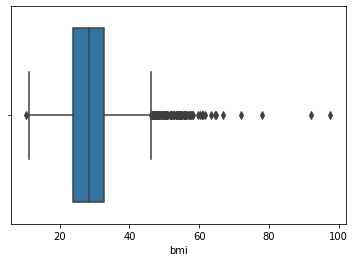

In [ ]:
sns.boxplot(x=df['bmi'])

outlier akan mempengaruhi model yang akan kita buat, jadi kita perlu menghapusnya, setelah dihapus dataset kita yang sebelumnya memiliki 5110 baris , sekarang hanya tinggal 4391 baris.

In [ ]:
q1= df.quantile(0.25)
q3= df.quantile(0.75)
iqr= q3-q1
dfn= df[~((df.select_dtypes(include='float64')<(q1-1.5*iqr))|(df.select_dtypes(include='float64')>(q3+1.5*iqr))).any(axis=1)]
dfn.shape


(4391, 12)

kita akan mencoba memvisualisasikan apakah gender, smoking status dan work type memiliki korelasi terhadap kemungkinan terjadinya stroke

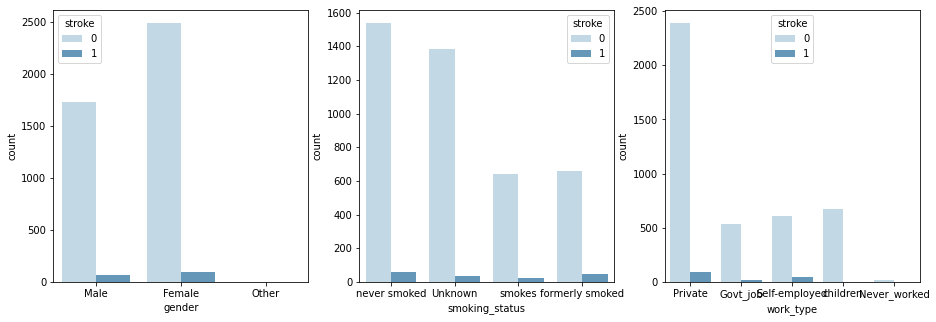

In [ ]:
plt.figure(figsize=(21,5))
plt.subplot(1,4,1)
sns.countplot(x=dfn['gender'], alpha=0.75, palette="Paired", hue=df['stroke']);
plt.subplot(1,4,2)
sns.countplot(x=dfn['smoking_status'], alpha=0.75, palette="Paired", hue=df['stroke']);
plt.subplot(1,4,3)
sns.countplot(x=dfn['work_type'], alpha=0.75, palette="Paired", hue=df['stroke']);


lalu kita coba melihat korelasi semua feature yang bertipe data numerik, apakah feature tersebut memiliki korelasi terhadap terjadinya penyakit jantung. dapat dilihat bahwa pada feature age, bmi dan avg_glucose-level memiliki hubungan yang kuat dengan stroke

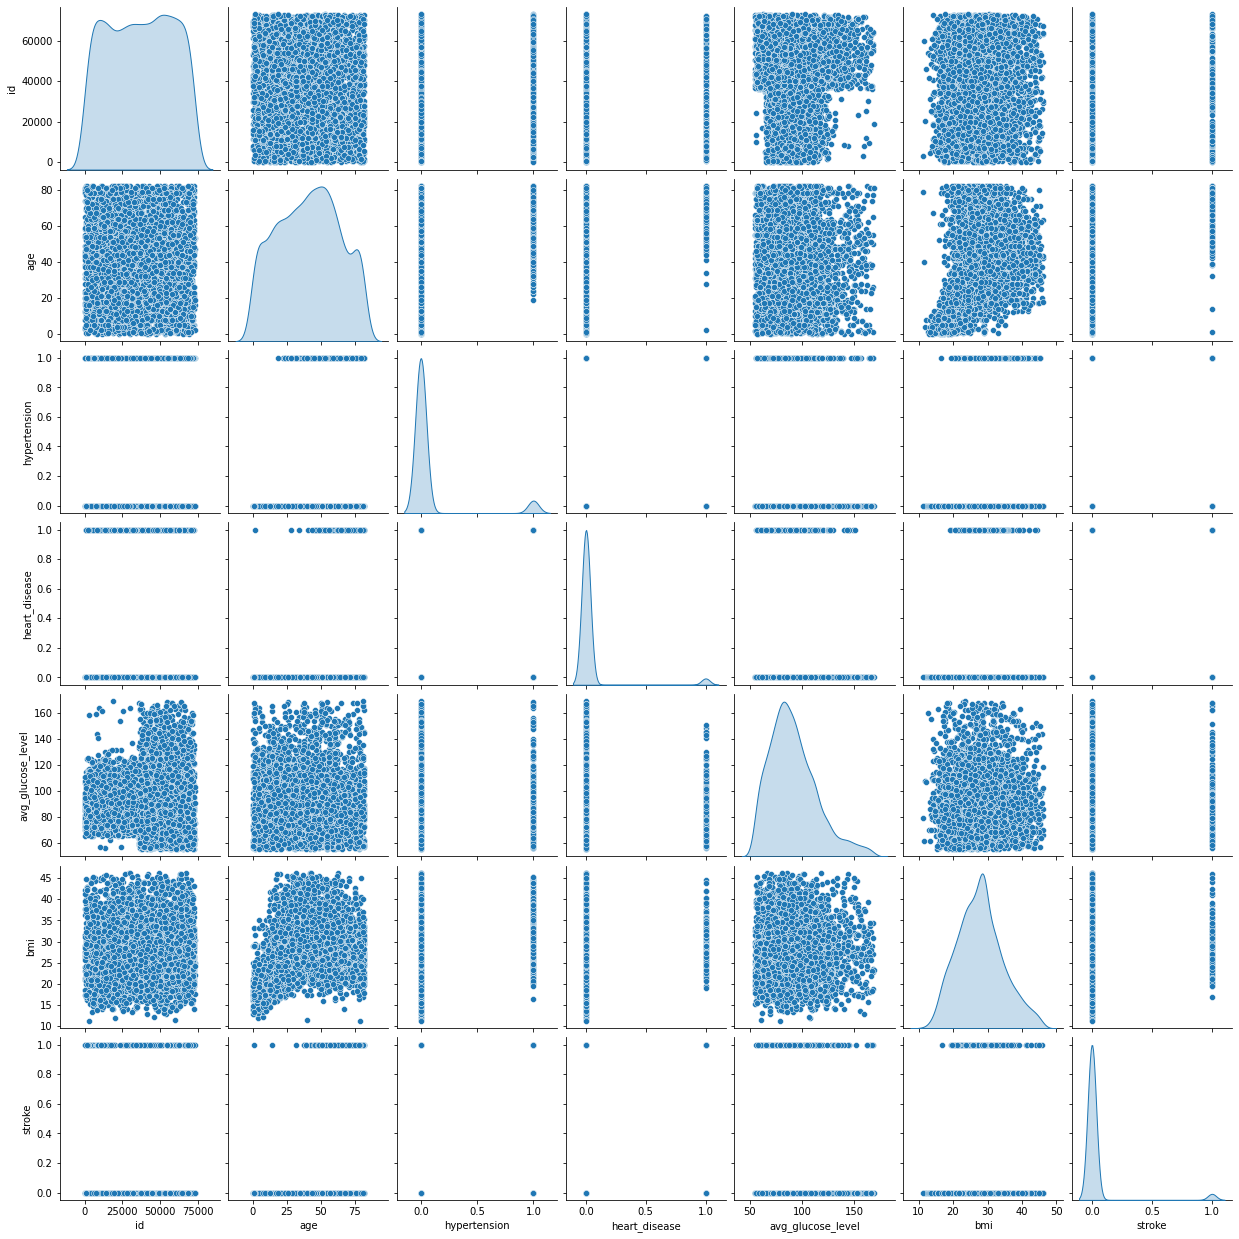

In [ ]:
sns.pairplot(dfn, diag_kind='kde')

grafik dibawah ini untuk melihat besarnya hubungan features bmi,age, dan avg_glucode_level dengan kemungkinan stroke

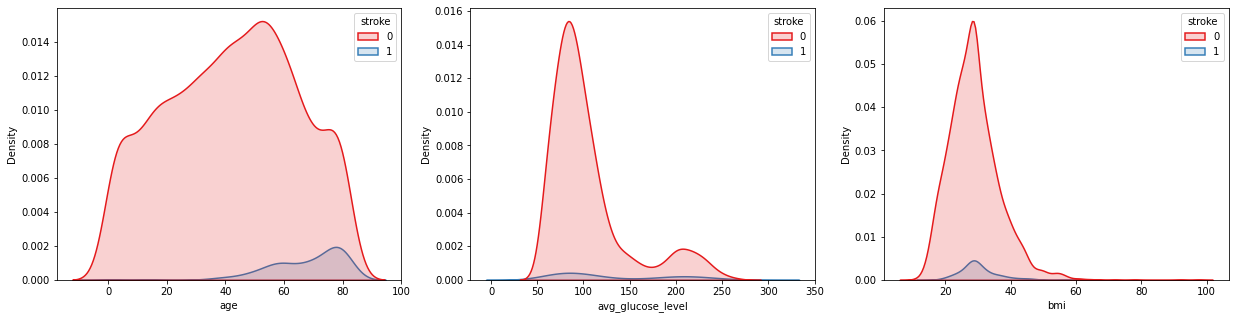

In [ ]:
plt.figure(figsize=(21,5))

plt.subplot(1,3,1)
sns.kdeplot(x=df['age'], alpha=0.2, palette="Set1", label='Smoker', fill=True, linewidth=1.5, hue=df['stroke']);
plt.subplot(1,3,2)
sns.kdeplot(x=df['avg_glucose_level'], alpha=0.2, palette="Set1", label='Smoker', fill=True, linewidth=1.5, hue=df['stroke']);
plt.subplot(1,3,3)
sns.kdeplot(x=df['bmi'], alpha=0.2, palette="Set1", label='Smoker', fill=True, linewidth=1.5, hue=df['stroke']);

selanjutnya kita menggunakan teknik one hot encoding untuk mendapatkan fitur baru yang berasal dari feature bertipe data kategori

In [ ]:
dfn= pd.concat([dfn, pd.get_dummies(dfn['gender'],prefix='gender', drop_first=True)],axis=1)
dfn= pd.concat([dfn, pd.get_dummies(dfn['ever_married'],prefix='ever_married', drop_first=True)],axis=1)
dfn= pd.concat([dfn, pd.get_dummies(dfn['work_type'],prefix='work_type', drop_first=True)],axis=1)
dfn= pd.concat([dfn, pd.get_dummies(dfn['smoking_status'],prefix='smoking_status', drop_first=True)],axis=1)


dan semua feature yang tidak kita butuhkan akan kita hapus

In [ ]:
dfn.drop(['id','gender','ever_married','work_type','smoking_status',
          'heart_disease','hypertension','Residence_type'],axis=1, inplace= True)
dfn.head()

,age,avg_glucose_level,bmi,stroke,gender_Male,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
2,80.0,105.92,32.500000,1,1,0,1,0,1,0,0,0,1,0
6,74.0,70.09,27.400000,1,1,0,1,0,1,0,0,0,1,0
7,69.0,94.39,22.800000,1,0,0,0,0,1,0,0,0,1,0
8,59.0,76.15,28.893237,1,0,0,1,0,1,0,0,0,0,0
9,78.0,58.57,24.200000,1,0,0,1,0,1,0,0,0,0,0


lalu kita membagi data set menjadi feature dan target, lalu datasetnya di bagi menjadi 80% untuk training dan 20% untuk testing

In [ ]:
x= dfn.drop(['stroke'], axis=1)
y= dfn['stroke']

x_train,x_test,y_train,y_test= train_test_split(x,y, test_size=0.2, random_state=42)

In [ ]:
print(f'Total # of sample in whole dataset: {len(x)}')
print(f'Total # of sample in train dataset: {len(x_train)}')
print(f'Total # of sample in test dataset: {len(x_test)}')

Total # of sample in whole dataset: 4391
Total # of sample in train dataset: 3512
Total # of sample in test dataset: 879


lalu sebelum model dibuat kita lakukan standarisasi pada feature avg_glucose_level dan bmi

In [ ]:
scaler= StandardScaler()
x_train= scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)


lalu kita membuat model machine learning menggunakan algoritma SVM

In [ ]:
svm= SVC()
svm.fit(x_train,y_train)
y_pred_svc= svm.predict(x_test)

dan metrik yang digunakan adalah matrik accuracy dengan nilai yang didapat adalah 95%

In [ ]:
print('accuracy:',metrics.accuracy_score(y_test,y_pred_svc))

accuracy: 0.9590443686006825
